# RESTAURANT RATING PREDICTOR

### Life cycle of Machine Learning Project

1. Understand the problem statement
2. Data Collection
3. Data Checks to perform 
4. Exploratory Data Analysis
5. Data Pre-processing
6. Model Training
7. Choose best model

### 1) Problem Statement:

Zomato Restaurants to predict their respective Ratings based on certain
features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2) Data Collection

In [2]:
df = pd.read_csv('data/zomato.csv')

In [3]:
df.shape

(51717, 17)

In [4]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### 3) Data checks to perform

In [5]:
df.rename(columns={'approx_cost(for two people)':'cost2people','listed_in(type)':'listed_in_type','listed_in(city)': 'listed_in_city'}, inplace=True)
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost2people,reviews_list,menu_item,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [6]:
# Check missing values
df.isnull().sum()

url                   0
address               0
name                  0
online_order          0
book_table            0
rate               7775
votes                 0
phone              1208
location             21
rest_type           227
dish_liked        28078
cuisines             45
cost2people         346
reviews_list          0
menu_item             0
listed_in_type        0
listed_in_city        0
dtype: int64

In [7]:
# Check duplicate values
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             51717 non-null  object
 1   address         51717 non-null  object
 2   name            51717 non-null  object
 3   online_order    51717 non-null  object
 4   book_table      51717 non-null  object
 5   rate            43942 non-null  object
 6   votes           51717 non-null  int64 
 7   phone           50509 non-null  object
 8   location        51696 non-null  object
 9   rest_type       51490 non-null  object
 10  dish_liked      23639 non-null  object
 11  cuisines        51672 non-null  object
 12  cost2people     51371 non-null  object
 13  reviews_list    51717 non-null  object
 14  menu_item       51717 non-null  object
 15  listed_in_type  51717 non-null  object
 16  listed_in_city  51717 non-null  object
dtypes: int64(1), object(16)
memory usage: 6.7+ MB


In [9]:
# Check the number of unique values of each column
df.nunique()

url               51717
address           11495
name               8792
online_order          2
book_table            2
rate                 64
votes              2328
phone             14926
location             93
rest_type            93
dish_liked         5271
cuisines           2723
cost2people          70
reviews_list      22513
menu_item          9098
listed_in_type        7
listed_in_city       30
dtype: int64

In [31]:
# Check various category present in different columns
print("Categories Online Order: \n", df['online_order'].unique(), "\n")

print("Categories Book Table: \n", df['book_table'].unique(), "\n")

print("Categories Online Order: \n", df['listed_in_type'].unique(), "\n\n")

print("Categories cuisines: \n", df['cuisines'].unique(), "\n\n")




Categories Online Order: 
 ['Yes' 'No'] 

Categories Book Table: 
 ['Yes' 'No'] 

Categories Online Order: 
 ['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars'] 


Categories cuisines: 
 ['North Indian, Mughlai, Chinese' 'Chinese, North Indian, Thai'
 'Cafe, Mexican, Italian' ... 'North Indian, Street Food, Biryani'
 'Chinese, Mughlai' 'North Indian, Chinese, Arabian, Momos'] 




#### 3.1.1) Tranform Rating Column to int


In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df['rate'] = df['rate'].replace(['/5', ' ','NEW','-'], ['','',0,np.nan], regex=True)
df['rate'] = df['rate'].astype(float)

In [13]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

#### 3.1.2) Fill Rate Column missing values with median 

In [14]:
imputer = SimpleImputer(strategy='median')

In [15]:
# Removing text attributes from dataset
df_num = df.drop([feature for feature in df.columns if df[feature].dtype == 'O'], axis=1)
df_num.head()


,rate,votes
0,4.1,775
1,4.1,787
2,3.8,918
3,3.7,88
4,3.8,166


In [16]:
imputer.fit(df_num)
imputer.statistics_

array([ 3.7, 41. ])

In [17]:
X = imputer.transform(df_num) # x is numpy array
df_num_tr = pd.DataFrame(X, columns=df_num.columns) # convert numpy array to dataframe
df_num_tr.isnull().sum()

rate     0
votes    0
dtype: int64

#### 3.1.3) Replace original 'Rate' column with new transformed 'Rate' column

In [18]:
# Add new 'Rate' transformed column
df['rate'] = df_num_tr['rate']

In [19]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost2people,reviews_list,menu_item,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [30]:
df['rate'].describe()

count    51717.000000
mean         3.542394
std          0.846159
min          0.000000
25%          3.400000
50%          3.700000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

#### 3.2.1) Add new Cusines column

In [40]:
# Find no.of cusines each restuarent have
new_cusines = df['cuisines'].str.split(',')
new_cusines = new_cusines.apply(lambda x: len(x) if x is not None and isinstance(x, list) else 0)

In [50]:
# Insert position after 'cusines' column
df.insert(12, 'no_of_cuisines',new_cusines)

In [51]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,no_of_cuisines,cost2people,reviews_list,menu_item,listed_in_type,listed_in_city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",3,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",3,800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [54]:
df['no_of_cuisines'].describe()

count    51717.000000
mean         2.452172
std          1.271782
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: no_of_cuisines, dtype: float64

## 4) Exploratory Data Analysis 

#### 4.1) Location Column

- How is the distribution of Restaurant Location?

In [20]:
df['location'].value_counts()

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

Observation
- There are 93 locations in Bangalore
- BTM has highest number of restaurants
- Peenya has the lowest number of restaurants

#### 4.2) Book_table Column
- 4.2.1 How is the distribution of Table Booking?
- 4.2.2 Is book table in advance effect rating?

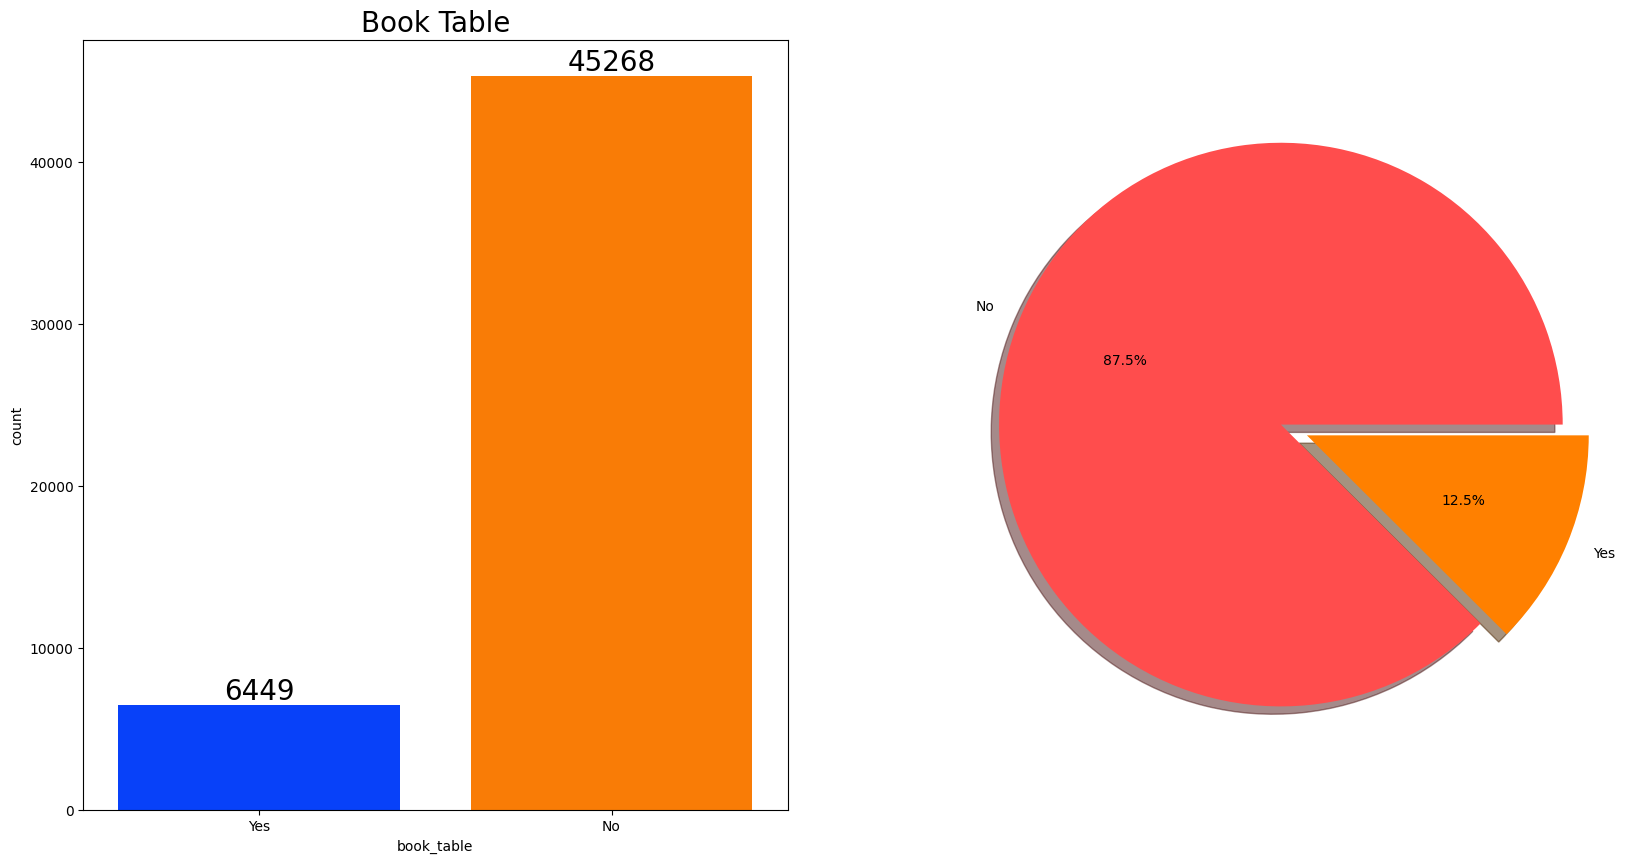

In [21]:
fig, axis = plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df['book_table'], data=df, palette='bright',ax=axis[0],saturation=.95)
for container in axis[0].containers:
    axis[0].bar_label(container,color='black',size=20)

axis[0].set_title('Book Table',fontsize=20)


plt.pie(x=df['book_table'].value_counts(),labels = df['book_table'].value_counts().index, explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


Observation:

- 87.7% of restaurants do not have the facility to book table in advance.
- Only 12.3% of restaurants have the facility to book table in advance.

#### 4.2.2 Is book table in advance effect rating?

In [22]:
table_book = df.groupby('book_table')['rate'].mean()

# Convert the Series to a DataFrame
table_book_df = table_book.reset_index()
table_book_df

,book_table,rate
0,No,3.468728
1,Yes,4.059482


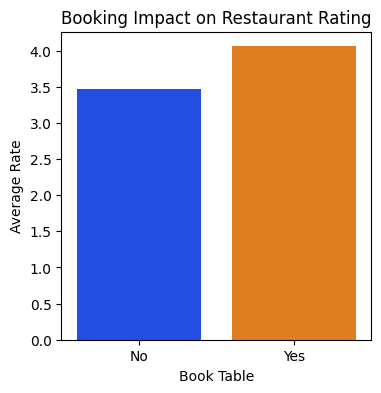

In [23]:
# Create a bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x='book_table', y='rate', data=table_book_df, palette='bright')
plt.xlabel('Book Table')
plt.ylabel('Average Rate')
plt.title('Booking Impact on Restaurant Rating')
plt.show()


Observation: 
- Book table in advance restaurants have higher rating
- As compare to restaurants with no book table option
- Hence book in advance impact rating.

#### 4.3) Online Order Column
- 4.3.1 how is the distribution of Online Order?
- 4.3.2 how online order impact restaurant rating?

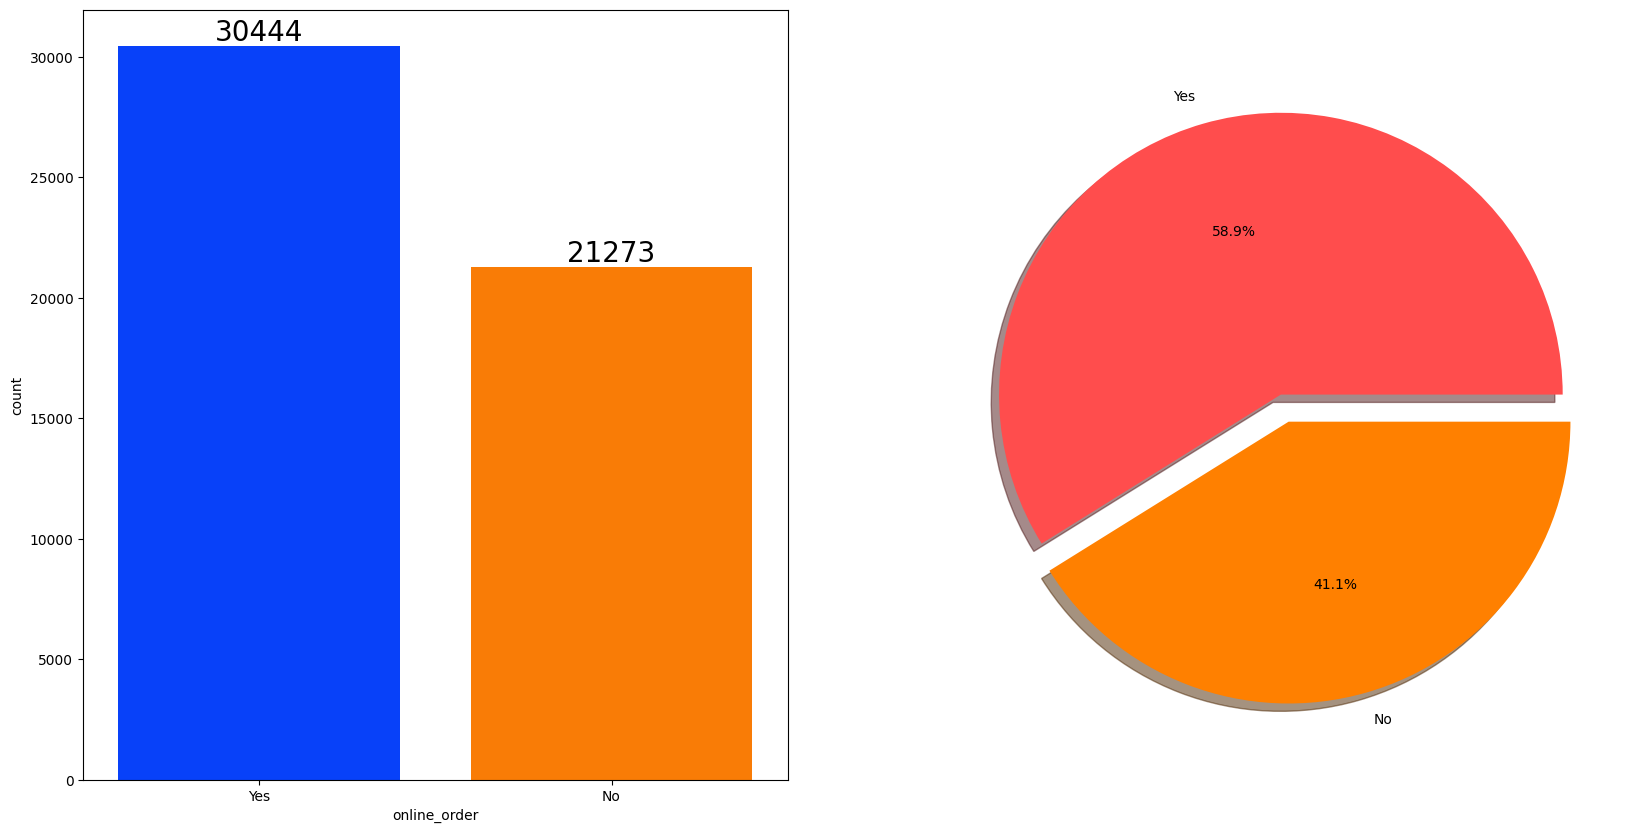

In [24]:
fig, axis = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['online_order'],data=df,palette='bright',ax=axis[0],saturation=.95)
for container in axis[0].containers:
    axis[0].bar_label(container,color='black',size=20)

plt.pie(x=df['online_order'].value_counts(), labels=df['online_order'].value_counts().index,autopct='%1.1f%%',
        explode=[0,0.1],shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Observation:
- 58.9% of restaurants provide online facility.


#### 4.3.2 how online order impact restaurant rating?

In [25]:
online_order = df.groupby('online_order')['rate'].mean()

# Convert the Series to a DataFrame
online_order_df = online_order.reset_index()
online_order_df

,online_order,rate
0,No,3.478771
1,Yes,3.586851


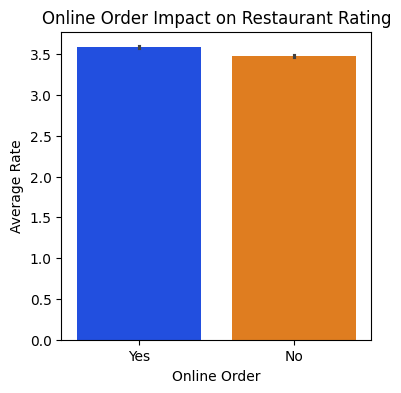

In [26]:
# Create a bar plot
plt.figure(figsize=(4,4))
sns.barplot(x=df['online_order'],y=df['rate'],data=online_order_df,palette='bright')
plt.xlabel('Online Order')
plt.ylabel('Average Rate')
plt.title('Online Order Impact on Restaurant Rating')
plt.show()

Observation:
- Not major impact of online order on restaurant rating
- Online order customer average rating is 3.5 
- Non online order customer average rating is 3.4

#### 4.4) No_of_Cuisine Column
- 4.4.1 Check the distribution of No_of_Cuisine? (Histogram)
- 4.4.2 How it impacts rating?

In [80]:
df['no_of_cuisines'].value_counts()

no_of_cuisines
2    17920
1    12402
3    12172
4     5869
5     2044
6      680
7      395
8      190
0       45
Name: count, dtype: int64

In [83]:
rest_with_2_cusines = (df['no_of_cuisines'].value_counts()[2] / df['no_of_cuisines'].count()) * 100
round(rest_with_2_cusines,2)

34.65

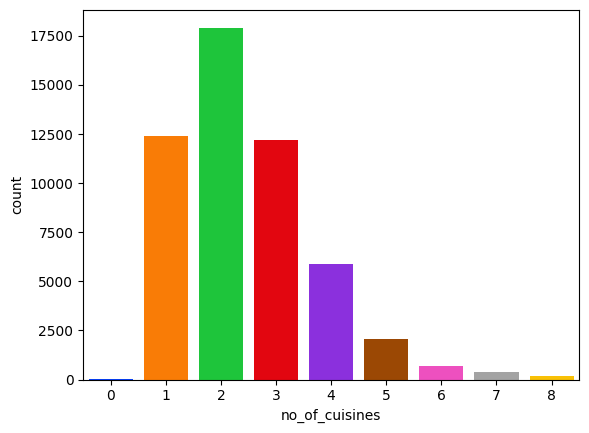

In [63]:
sns.countplot(x=df['no_of_cuisines'],data=df,palette='bright',saturation=.95)
plt.show()

Observation:
- Most restaurants list 2 cuisines, accounting for 34.6% of all restaurants.
- 45 restaurants haven't listed their cuisines.
- The fewest restaurants, only 190, offer 8 cuisines.